In [1]:
#Import all the necessary modules.
import pandas  as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

import numpy as np

In [2]:
#Read the csv data set for Corona Virus.

Cor = pd.read_csv('2019_nC0v_20200121_20200126 - SUMMARY.csv')

#Display the dataset.
Cor

,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,Shanghai,Mainland China,1/21/2020,9.0,10.0,NaN,NaN
1,Yunnan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
2,Beijing,Mainland China,1/21/2020,10.0,NaN,NaN,NaN
3,Taiwan,Mainland China,1/21/2020,1.0,NaN,NaN,NaN
4,Jilin,Mainland China,1/21/2020,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...
363,NaN,France,1/26/2020 11:00 AM,3.0,NaN,NaN,NaN
364,NaN,Australia,1/26/2020 11:00 AM,4.0,NaN,NaN,NaN
365,NaN,Nepal,1/26/2020 11:00 AM,1.0,NaN,NaN,NaN
366,NaN,Malaysia,1/26/2020 11:00 AM,4.0,NaN,NaN,NaN


The dataset above shows some information concerning the spread of Corona Virus 2019/2020 virus. The table has 7 columns--Province/State, Country, Date last updated, Confirmed, Suspected, Recovered and Deaths, and filled with 368 rows of data. The objective of analysing this data set is to;

1. Determine the confirmed affected countries.
2. Sorting countries in descending order of infected persons.
3. Determine the most affected country.
4. Determine the percentage of suspected, recovered and deaths in the most affected country.

In [3]:
#View data set based on some columns alone.
read = Cor[['Country', 'Confirmed', 'Deaths', 'Recovered']]
read

,Country,Confirmed,Deaths,Recovered
0,Mainland China,9.0,NaN,NaN
1,Mainland China,1.0,NaN,NaN
2,Mainland China,10.0,NaN,NaN
3,Mainland China,1.0,NaN,NaN
4,Mainland China,NaN,NaN,NaN
...,...,...,...,...
363,France,3.0,NaN,NaN
364,Australia,4.0,NaN,NaN
365,Nepal,1.0,NaN,NaN
366,Malaysia,4.0,NaN,NaN


In [4]:
#Sort the dataset in descending order of number of infected persons.
group = read.sort_index(by = ['Confirmed'], ascending=False)
DataFrame(group)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,Country,Confirmed,Deaths,Recovered
322,Mainland China,1058.0,52.0,42.0
278,Mainland China,1052.0,52.0,42.0
234,Mainland China,761.0,40.0,32.0
190,Mainland China,729.0,39.0,32.0
111,Mainland China,549.0,24.0,31.0
...,...,...,...,...
108,Mexico,NaN,NaN,NaN
109,Brazil,NaN,NaN,NaN
110,Colombia,NaN,NaN,NaN
181,Mainland China,NaN,NaN,NaN


In [5]:
#Joining similar Countries and adding up the values.
grouping = group.groupby(['Country'], as_index=False).sum()
grouping

,Country,Confirmed,Deaths,Recovered
0,Australia,13.0,0.0,0.0
1,Brazil,0.0,0.0,0.0
2,Canada,1.0,0.0,0.0
3,China,0.0,0.0,0.0
4,Colombia,0.0,0.0,0.0
5,France,14.0,0.0,0.0
6,Hong Kong,29.0,0.0,0.0
7,Japan,18.0,0.0,1.0
8,Macau,17.0,0.0,0.0
9,Mainland China,10056.0,265.0,275.0


TABLE 1.0 

The TABLE 1.0 above shows the viral information of confirmed affected countries which are 21 in number.

In [6]:
#Rearranging in descending number of confirmed infections.
re_index = grouping.sort_index(by = ['Confirmed'], ascending=False)
re_index

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


,Country,Confirmed,Deaths,Recovered
9,Mainland China,10056.0,265.0,275.0
17,Thailand,43.0,0.0,2.0
6,Hong Kong,29.0,0.0,0.0
14,Singapore,18.0,0.0,0.0
16,Taiwan,18.0,0.0,0.0
7,Japan,18.0,0.0,1.0
8,Macau,17.0,0.0,0.0
15,South Korea,16.0,0.0,0.0
20,Vietnam,14.0,0.0,0.0
18,US,14.0,0.0,0.0


TABLE 2.0

The Table above shows the sorted countries in descending order of infected persons.


In [7]:
#Removing countries with no entries for confirmed infections.

re_index_ = re_index[:16]
re_index_

,Country,Confirmed,Deaths,Recovered
9,Mainland China,10056.0,265.0,275.0
17,Thailand,43.0,0.0,2.0
6,Hong Kong,29.0,0.0,0.0
14,Singapore,18.0,0.0,0.0
16,Taiwan,18.0,0.0,0.0
7,Japan,18.0,0.0,1.0
8,Macau,17.0,0.0,0.0
15,South Korea,16.0,0.0,0.0
20,Vietnam,14.0,0.0,0.0
18,US,14.0,0.0,0.0


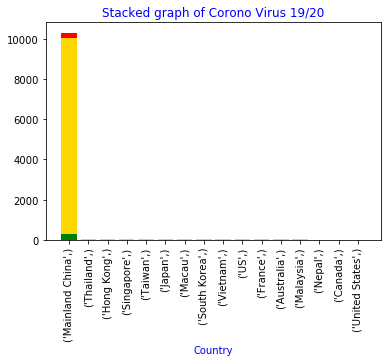

In [8]:
#Assigning names to each column to be plotted.
A = list(re_index_['Confirmed'])
B = list(re_index_['Deaths'])
C = list(re_index_['Recovered'])
count = [tuple(x) for x in re_index_[['Country']].values]

#Declaring the length of the values of variables A,B,C.
c = np.arange(len(count)) 

#Plot the bar chart.
plt.bar(c, [int(x) for x in A], align='center', color='gold', bottom=B)
plt.bar(c, [int(x) for x in B], align='center', color='r', bottom= A)
plt.bar(c, [int(x) for x in C], align='center', color='g')
plt.xticks(c, count, rotation=90)
plt.xlabel('Country', color='b')
plt.title('Stacked graph of Corono Virus 19/20', color='b')
plot = plt.show()
plot

where;  Green = Recovered, 
        Gold = Confirmed, 
        Red = Deaths

From the visualization, it can be deduced that;

1. Mainland China is the most devastated country with the highest numbers of confirmed infections.
2. Canada , Nepal and  United States, compared to Mainland China, have little to no confirmed infections.
3. Only Mainland China has any recorded Deaths or Recovery, however, infected persons in other countries have neither died nor recovered. 

In [9]:
re_index_

,Country,Confirmed,Deaths,Recovered
9,Mainland China,10056.0,265.0,275.0
17,Thailand,43.0,0.0,2.0
6,Hong Kong,29.0,0.0,0.0
14,Singapore,18.0,0.0,0.0
16,Taiwan,18.0,0.0,0.0
7,Japan,18.0,0.0,1.0
8,Macau,17.0,0.0,0.0
15,South Korea,16.0,0.0,0.0
20,Vietnam,14.0,0.0,0.0
18,US,14.0,0.0,0.0


In [10]:
mc = re_index[:1]
mc

,Country,Confirmed,Deaths,Recovered
9,Mainland China,10056.0,265.0,275.0


Fron the analysis, the most affected country is Mainland China with 10056 confirmed infected persons, 265 deaths and 275 recovery.

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


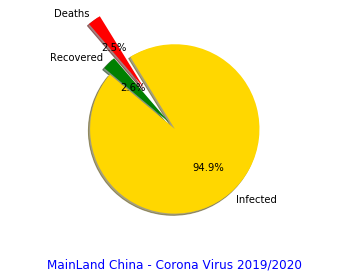

In [11]:
c = list(mc['Confirmed'])
d = list(mc['Deaths'])
r = list(mc['Recovered'])
explode = (0.1, 0.5, 0)

labels = ['Infected', 'Deaths', 'Recovered']
colors = ['gold', 'r', 'g']
sizes = [c, d, r]

plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.xlabel('\n\nMainLand China - Corona Virus 2019/2020', color='b', fontsize = 12)

plt.axis('equal')
plt.show()

From the pie chart above, Of those confirmed to be infected with CoronaVirus in Mainland China;
1. 2.5% died,
2. 2.6% recovered,
3. While 94.9% still remain infected.

In [12]:
re_index_.to_csv('Task3.csv', encoding='utf-8')
pd.read_csv('Task3.csv')

,Unnamed: 0,Country,Confirmed,Deaths,Recovered
0,9,Mainland China,10056.0,265.0,275.0
1,17,Thailand,43.0,0.0,2.0
2,6,Hong Kong,29.0,0.0,0.0
3,14,Singapore,18.0,0.0,0.0
4,16,Taiwan,18.0,0.0,0.0
5,7,Japan,18.0,0.0,1.0
6,8,Macau,17.0,0.0,0.0
7,15,South Korea,16.0,0.0,0.0
8,20,Vietnam,14.0,0.0,0.0
9,18,US,14.0,0.0,0.0
